In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# read exp_kriging_output.csv
doe = pd.read_csv("exp_kriging_input.csv", index_col=0)
results = pd.read_csv("exp_kriging_output.csv", index_col=0)

In [7]:
# merge doe and results
doe_results = pd.merge(doe, results, left_index=True, right_index=True)

In [8]:
doe_results

,num_sample,problem,seed,progress,mae,mse,r2,cpu_time
0,2,Forrester_1a,1,finished,2.780759,19.860751,-0.000904,0.073436
1,4,Forrester_1a,1,finished,2.851170,31.787197,-0.601950,0.051333
2,6,Forrester_1a,1,finished,1.099396,3.087843,0.844385,0.131223
3,8,Forrester_1a,1,finished,1.370137,9.211839,0.535759,0.116261
4,10,Forrester_1a,1,finished,0.062310,0.048628,0.997549,0.128586
...,...,...,...,...,...,...,...,...
2595,32,mf_Sixhump,10,finished,0.034342,0.012851,0.999922,3.514302
2596,34,mf_Sixhump,10,finished,0.016052,0.001631,0.999990,4.544929
2597,36,mf_Sixhump,10,finished,0.013489,0.000886,0.999995,3.744726
2598,38,mf_Sixhump,10,finished,0.016635,0.002265,0.999986,4.933910


In [17]:
doe_results["problem"].values

array(['Forrester_1a', 'Forrester_1a', 'Forrester_1a', ..., 'mf_Sixhump',
       'mf_Sixhump', 'mf_Sixhump'], dtype=object)

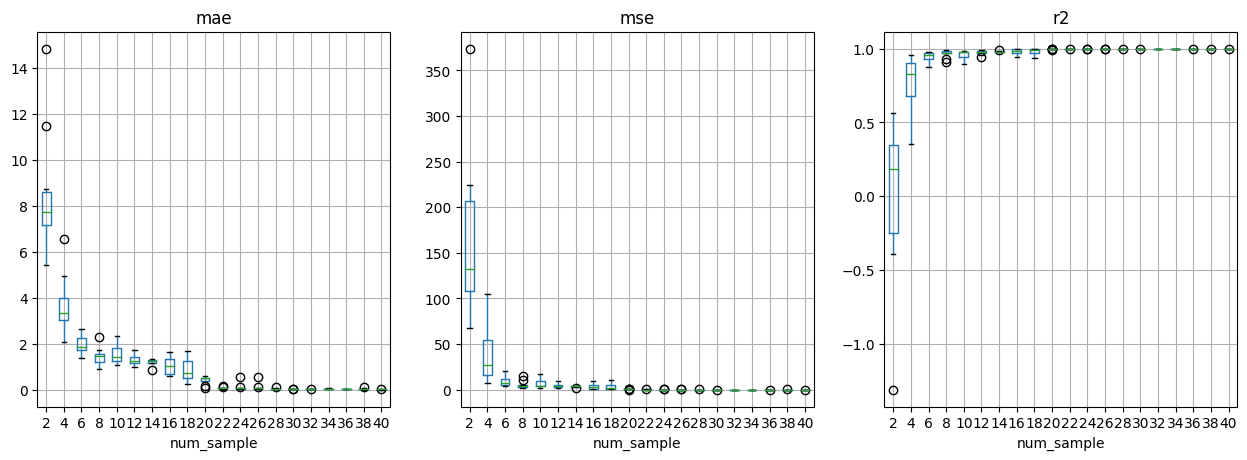

In [15]:
# get function name from problem column
# get a sub-dataframe with only specific problem
doe_results_1b = doe_results[doe_results["problem"] == "mf_Sixhump"]


# plot boxplot regarding mae, mse r2 with respect to different number of samples on  Forrester 1b function
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
doe_results_1b.boxplot(column=["mae"], by="num_sample", ax=ax[0])
doe_results_1b.boxplot(column=["mse"], by="num_sample", ax=ax[1])
doe_results_1b.boxplot(column=["r2"], by="num_sample", ax=ax[2])
ax[0].set_title("mae")
ax[1].set_title("mse")
ax[2].set_title("r2")
plt.suptitle("")
plt.show()

In [12]:
# results of num_sample = 10
doe_results_1b[doe_results_1b["num_sample"] == 18]

,num_sample,problem,seed,progress,mae,mse,r2,cpu_time
2408,18,mf_Sixhump,1,finished,1.516507,5.681544,0.964795,0.693894
2428,18,mf_Sixhump,2,finished,0.973791,3.135533,0.980620,1.653505
2448,18,mf_Sixhump,3,finished,1.683804,9.959715,0.938844,1.793433
2468,18,mf_Sixhump,4,finished,0.564623,0.494170,0.997046,1.729423
2488,18,mf_Sixhump,5,finished,0.502518,0.367229,0.997749,1.609228
2508,18,mf_Sixhump,6,finished,0.823833,2.114959,0.986923,1.440966
2528,18,mf_Sixhump,7,finished,0.257344,0.299396,0.998189,1.114295
2548,18,mf_Sixhump,8,finished,1.330798,5.679582,0.964841,2.351357
2568,18,mf_Sixhump,9,finished,0.522024,0.358376,0.997704,1.357129
2588,18,mf_Sixhump,10,finished,0.620764,0.591945,0.996411,2.006632


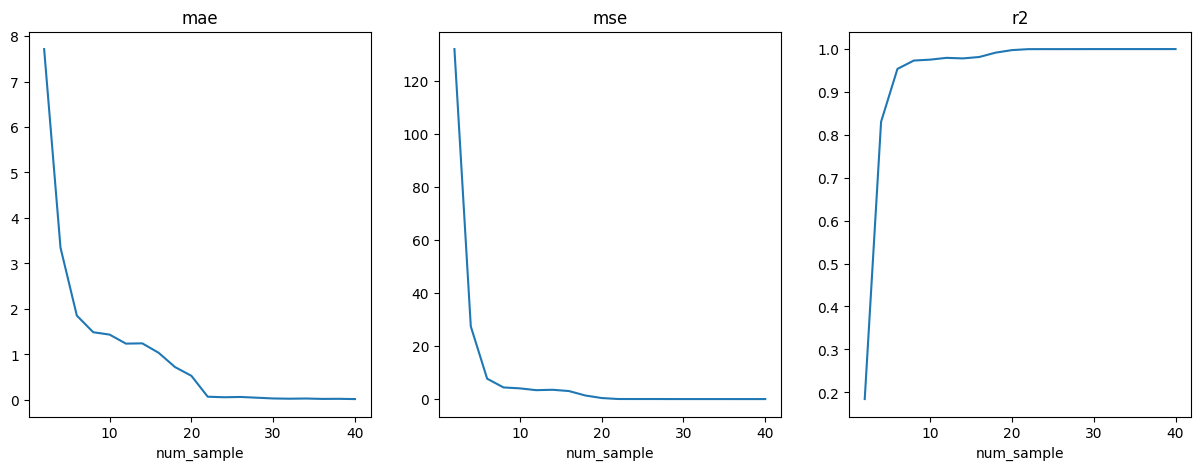

In [13]:
# plot median value regarding mae, mse r2 with respect to different number of samples
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
doe_results_1b.groupby(["num_sample"])["mae"].median().plot(ax=ax[0])
doe_results_1b.groupby(["num_sample"])["mse"].median().plot(ax=ax[1])
doe_results_1b.groupby(["num_sample"])["r2"].median().plot(ax=ax[2])
ax[0].set_title("mae")
ax[1].set_title("mse")
ax[2].set_title("r2")
plt.suptitle("")
plt.show()